1. Veri okuma ve inceleme

In [12]:
# Gerekli kütüphaneler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV dosyasını oku
df = pd.read_csv("dataset/creditcard.csv")

# İlk birkaç satıra göz atalım
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


2. Veri Kümesi hakkında genel bilgi

In [13]:
# Veri kümesinin yapısı
df.info()

# Sayısal özet istatistikler
df.describe()

# Sınıf dağılımı (fraud vs normal)
df['Class'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Class
0    284315
1       492
Name: count, dtype: int64

3. Sınıf dengesizliğini görselleştirme

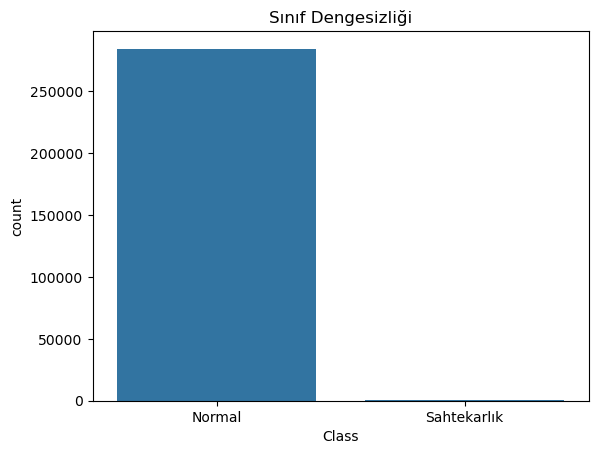

In [14]:
# Sınıf oranlarını yüzdeyle gösterelim
sns.countplot(x='Class', data=df)
plt.title("Sınıf Dengesizliği")
plt.xticks([0, 1], ['Normal', 'Sahtekarlık'])
plt.show()

4. Train ve test veri setlerini ayırma ve Train veri setini SMOTE ile dengeleme

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd
import joblib

# 1. Özellik ve etiket ayırma
X = df.drop('Class', axis=1)
y = df['Class']

# 2. Train/Test ayırımı
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Ölçekleme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. SMOTE ile sınıf dengesi sağlama (sadece eğitim verisine!)
from collections import Counter

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("SMOTE sonrası eğitim verisi sınıf dağılımı:", Counter(y_train_resampled))

SMOTE sonrası eğitim verisi sınıf dağılımı: Counter({0: 199020, 1: 199020})


5. Train ve test veri setini kaydetme

In [16]:
# Eğitim seti
train_df = pd.DataFrame(X_train_resampled, columns=X.columns)
train_df['Class'] = y_train_resampled.reset_index(drop=True)
train_df.to_csv("dataset/train_balanced.csv", index=False)

# Test seti (dokunulmamış haliyle)
test_df = pd.DataFrame(X_test_scaled, columns=X.columns)
test_df['Class'] = y_test.reset_index(drop=True)
test_df.to_csv("dataset/test_scaled.csv", index=False)